# Survival Analysis of Breast Cancer Patients

## A Comparative Study Using Kaplan-Meier Estimator and Cox Proportional Hazards Model

## Introduction

Breast cancer is a leading cause of cancer-related deaths worldwide. Understanding survival patterns and identifying prognostic factors are crucial for effective treatment and management. This study aims to conduct a survival analysis of [Breast Cancer Patients](https://www.kaggle.com/datasets/gunesevitan/breast-cancer-metabric) using Kaplan-Meier estimation and Cox Proportional Hazards (CoxPH) modeling.

### I. Data Preprocessing

- Handling missing values (K-Nearest Neighbors imputation)
- Encoding categorical columns (one-hot, label, and binary encoding)

### II. Kaplan-Meier Survival Curve Analysis

- Interpretation of survival probability trends
- Median survival time estimation
- Comparison of survival curves for different patient groups

### III. Cox Proportional Hazards (CoxPH) Model Analysis

- Model formulation and fitting
- Identification of significant predictors of survival
- Hazard ratio calculation and interpretation

### IV. Conclusion


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read CSV file
df = pd.read_csv('Breast Cancer METABRIC.csv')

# Display first few rows of the DataFrame
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [3]:
# Check data shape and info
print(df.shape)

(2509, 34)


## categorized summary of the 34 columns

### Patient Information (5)
1. Patient ID
2. Age at Diagnosis
3. Sex
4. Patient's Vital Status
5. Menopausal State

### Cancer Details (8)
1. Cancer Type
2. Cancer Type Detailed
3. Cellularity
4. Tumor Size
5. Tumor Stage
6. Neoplasm Histologic Grade
7. Tumor Other Histologic Subtype
8. Primary Tumor Laterality

### Treatment Information (6)
1. Type of Breast Surgery
2. Chemotherapy
3. Hormone Therapy
4. Radio Therapy
5. Relapse Free Status
6. Overall Survival Status

### Molecular Subtype (4)
1. Pam50 + Claudin-low subtype
2. 3-Gene classifier subtype
3. ER Status
4. HER2 Status

### Hormone Receptor Status (3)
1. ER status measured by IHC
2. PR Status
3. Neoplasm Histologic Grade

### Survival and Recurrence (4)
1. Overall Survival (Months)
2. Relapse Free Status (Months)
3. Relapse Free Status
4. Nottingham prognostic index

### Genetic Information (2)
1. Oncotree Code
2. Mutation Count

### Additional Information (2)
1. Integrative Cluster
2. Lymph nodes examined positive

These categories can guide us analysis and visualization of the data.


## Finding numerical and categorical columns

In [4]:
# Find numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print(numerical_columns)

# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

Categorical Columns:
Index(['Patient ID', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 'ER Status',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Oncotree Code', 'Overall Survival Status',
       'PR Status', 'Radio Therapy', 'Relapse Free Status', 'Sex',
       '3-Gene classifier subtype', 'Patient's Vital Status'],
      dtype='object')


## Define numerical columns

In [5]:

numerical_cols = [
    'Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
    'Lymph nodes examined positive', 'Mutation Count',
    'Nottingham prognostic index', 'Overall Survival (Months)',
    'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage'
]

## Check for missing values in numerical columns

In [6]:
missing_values_numerical = df[numerical_cols].isnull().sum()
print("\nMissing Values in Numerical Columns:")
print(missing_values_numerical)


Missing Values in Numerical Columns:
Age at Diagnosis                  11
Cohort                            11
Neoplasm Histologic Grade        121
Lymph nodes examined positive    266
Mutation Count                   152
Nottingham prognostic index      222
Overall Survival (Months)        528
Relapse Free Status (Months)     121
Tumor Size                       149
Tumor Stage                      721
dtype: int64


## Get a descriptive summary for numerical columns

In [7]:

numerical_summary = df[numerical_cols].describe()

print("Descriptive Summary of Numerical Columns:")
numerical_summary

Descriptive Summary of Numerical Columns:


,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


## Data Preprocessing: Handling Missing Values
After I analyzing missing values and basic statistics table for the numerical columns. To effectively handle the missing values in the numerical columns, I implemented K-Nearest Neighbors (KNN) imputation. The steps undertaken are as follows:

1. **Numerical Columns Selected for Imputation:**
   - **Age at Diagnosis**
   - **Cohort**
   - **Neoplasm Histologic Grade**
   - **Lymph nodes examined positive**
   - **Mutation Count**
   - **Nottingham prognostic index**
   - **Overall Survival (Months)**
   - **Relapse Free Status (Months)**
   - **Tumor Size**
   - **Tumor Stage**

2. **KNN Imputation:**
   - I created an instance of `KNNImputer` with 5 neighbors. This method estimates the missing values based on the values of the nearest neighbors in the dataset. Specifically, it identifies the `k` closest data points (neighbors) to the instance with missing values, and then imputes the missing values based on the average (or weighted average) of these neighbors.
   - The imputer was then applied to fill missing values in the selected numerical columns using the `fit_transform` method. This approach helps in preserving the distribution and relationships of the data, as it relies on the existing data points rather than arbitrary values.

3. **Handling Remaining Missing Values:**
   - After KNN imputation, rows with missing values specifically in the columns 'Lymph nodes examined positive' and 'Mutation Count' were removed from the dataset to ensure data integrity. This step was necessary to retain a reliable dataset for analysis, as these columns are critical for understanding tumor characteristics.

This process not only enhanced the quality of the dataset by addressing missing values but also ensured a cleaner dataset for subsequent analysis and modeling tasks. By employing KNN imputation, I aimed to maintain the relationships within the data while minimizing the potential bias that might arise from oter imputation methods.
is and modeling tasks.
impute effectively.


In [8]:
from sklearn.impute import KNNImputer

# Select numerical columns to apply KNN Imputation
numerical_cols = ['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
                  'Lymph nodes examined positive', 'Mutation Count',
                  'Nottingham prognostic index', 'Overall Survival (Months)',
                  'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage']

# Create an instance of KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

In [9]:
# Drop rows with missing values in 'Lymph nodes examined positive' and 'Mutation Count'
df.dropna(subset=['Lymph nodes examined positive', 'Mutation Count'], inplace=True)

In [10]:
missing_values_numerical = df[numerical_cols].isnull().sum()
print("\nMissing Values in Numerical Columns:")
print(missing_values_numerical)


Missing Values in Numerical Columns:
Age at Diagnosis                 0
Cohort                           0
Neoplasm Histologic Grade        0
Lymph nodes examined positive    0
Mutation Count                   0
Nottingham prognostic index      0
Overall Survival (Months)        0
Relapse Free Status (Months)     0
Tumor Size                       0
Tumor Stage                      0
dtype: int64


## Define categorical columns

In [11]:

categorical_cols = [
    'Type of Breast Surgery', 
    'Cancer Type', 
    'Cancer Type Detailed', 
    'Cellularity', 
    'Chemotherapy', 
    'Pam50 + Claudin-low subtype', 
    'ER status measured by IHC', 
    'ER Status', 
    'HER2 status measured by SNP6', 
    'HER2 Status', 
    'Tumor Other Histologic Subtype', 
    'Hormone Therapy', 
    'Inferred Menopausal State', 
    'Integrative Cluster', 
    'Primary Tumor Laterality', 
    'Oncotree Code', 
    'Overall Survival Status', 
    'PR Status', 
    'Radio Therapy', 
    'Relapse Free Status', 
    'Sex', 
    '3-Gene classifier subtype', 
    'Patient\'s Vital Status'
]

## Checking complete picture of each categorical column in the DataFrame

In [12]:

missing_values_categorical = df[categorical_cols].isnull().sum()
print("\nMissing Values in Categorical Columns:")
print(missing_values_categorical)


Missing Values in Categorical Columns:
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
ER status measured by IHC          83
ER Status                          40
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Oncotree Code                       0
Overall Survival Status           528
PR Status                         529
Radio Therapy                     529
Relapse Free Status                21
Sex                                 0
3-Gene classifier subtype         745
Patient's Vital Status            529
dtype: int64


## Check each categorical column exists in the DataFrame

In [13]:


for col in categorical_cols:
    if col in df.columns:
        print(f"Unique values in {col}:")
        print(df[col].value_counts(dropna=False))  # Include NaN counts if needed
        print("\n")
    else:
        print(f"Column '{col}' is not present in the DataFrame.\n")

# Count the unique values for existing columns
for col in categorical_cols:
    if col in df.columns:
        print(f"Unique values in {col}: {df[col].nunique()}")
    else:
        print(f"Column '{col}' is not present in the DataFrame.")

Unique values in Type of Breast Surgery:
Type of Breast Surgery
Mastectomy           1170
Breast Conserving     785
NaN                   554
Name: count, dtype: int64


Unique values in Cancer Type:
Cancer Type
Breast Cancer     2506
Breast Sarcoma       3
Name: count, dtype: int64


Unique values in Cancer Type Detailed:
Cancer Type Detailed
Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: count, dtype: int64


Unique values in Cellularity:
Cellularity
High        965
Moderate    737
NaN         592
Low         215
Name: count, dtype: int64


Unique values in Chemotherapy:
Chemotherapy
No     1568
NaN     529
Yes     412
Name: count,

## Strategies for Filling Missing Values in Categorical Columns

To fill the missing values in these categorical columns, we can apply different strategies depending on the data's context and meaning. 

These are some common approaches:

### Strategies for Filling Missing Values

1. **Fill with the Mode (Most Frequent Value)**:
   If the missing values are relatively few and We want to maintain the general distribution, replacing NaN with the mode (most frequent value) is a good option.

2. **Fill with a Specific Category (e.g., 'Unknown')**:
   If the NaN values have no clear replacement, We can fill them with a new category like 'Unknown' or 'Not Specified'.

3. **Domain Knowledge**:
   In some cases, domain-specific knowledge is used the missing values should be (e.g., if 'Hormone Therapy' is missing, it could be filled with 'No' if the patient is not receiving treatment).


In [14]:
# Fill missing values for each column based on the chosen strategy
fillna_strategies = {
    'Type of Breast Surgery': 'Mastectomy',  # Fill with mode
    'Cancer Type': 'Breast Cancer',  # Fill with mode
    'Cellularity': 'Moderate',  # Fill with mode
    'Chemotherapy': 'No',  # Assume 'No' where missing
    'Pam50 + Claudin-low subtype': 'Unknown',  # Create a new category for missing values
    'ER status measured by IHC': 'Positive',  # Fill with mode
    'ER Status': 'Positive',  # Fill with mode
    'HER2 status measured by SNP6': 'Neutral',  # Fill with mode
    'HER2 Status': 'Negative',  # Fill with mode
    'Tumor Other Histologic Subtype': 'Ductal/NST',  # Fill with mode
    'Hormone Therapy': 'No',  # Assume 'No' where missing
    'Inferred Menopausal State': 'Post',  # Fill with mode
    'Integrative Cluster': 'Unknown',  # New category for missing values
    'Primary Tumor Laterality': 'Left',  # Fill with mode
    'Overall Survival Status': 'Living',  # Assume 'Living' if not recorded
    'PR Status': 'Positive',  # Fill with mode
    'Radio Therapy': 'No',  # Assume 'No' where missing
    'Relapse Free Status': 'Not Recurred',  # Fill with mode
    '3-Gene classifier subtype': 'Unknown',  # New category for missing values
    'Patient\'s Vital Status': 'Living'  # Assume 'Living' if not recorded
}

# Apply the fill strategy without using inplace
for col, fill_value in fillna_strategies.items():
    if col in df.columns:
        df[col] = df[col].fillna(fill_value)

## Check missing values again each categorical column

In [15]:
missing_values = df[categorical_cols].isnull().sum()
print(missing_values)

Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
ER status measured by IHC         0
ER Status                         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Oncotree Code                     0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status               0
Sex                               0
3-Gene classifier subtype         0
Patient's Vital Status            0
dtype: int64


## See the Complete picture of the categorical columns before Encoding

In [16]:
for col in categorical_cols:
    if col in df.columns:
        print(f"Unique values in {col}:")
        print(df[col].value_counts(dropna=False))  # Include NaN counts if needed
        print("\n")
    else:
        print(f"Column '{col}' is not present in the DataFrame.\n")

# Count the unique values for existing columns
for col in categorical_cols:
    if col in df.columns:
        print(f"Unique values in {col}: {df[col].nunique()}")
    else:
        print(f"Column '{col}' is not present in the DataFrame.")

Unique values in Type of Breast Surgery:
Type of Breast Surgery
Mastectomy           1724
Breast Conserving     785
Name: count, dtype: int64


Unique values in Cancer Type:
Cancer Type
Breast Cancer     2506
Breast Sarcoma       3
Name: count, dtype: int64


Unique values in Cancer Type Detailed:
Cancer Type Detailed
Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: count, dtype: int64


Unique values in Cellularity:
Cellularity
Moderate    1329
High         965
Low          215
Name: count, dtype: int64


Unique values in Chemotherapy:
Chemotherapy
No     2097
Yes     412
Name: count, dtype: int64


Unique values in Pam50 + Claudin-lo

## Encoding Categorical Columns

To encode the categorical columns i your datasetWeou should choose an appropriate encoding method based on the number of unique valueswe will l explain various encoding techniques suitable for the colum.d.

### 1. One-Hot Encoding

One-hot encoding is suitable for categorical variables that do not have an ordinal relationship. It creates a new binary column for each unique value in the original column, where each column represents a category.Usingommended for:
- **Type of Breast Surgery** (2 unique values: Mastectomy, Breast Conserving)
- **Cancer Type** (2 unique values: Breast Cancer, Breast Sarcoma)
- **Chemotherapy** (2 unique values: Yes, No)
- **Hormone Therapy** (2 unique values: Yes, No)
- **Inferred Menopausal State** (2 unique values: Post, Pre)
- **Overall Survival Status** (2 unique values: Living, Deceased)
- **PR Status** (2 unique values: Positive, Negative)
- **Radio Therapy** (2 unique values: Yes, No)
- **Relapse Free Status** (2 unique values: Not Recurred, Recurred)
- **Sex** (1 unique value: Female - may nos_to_encode, drop_first=True)


## 2. Label Encoding

Label encoding assigns a unique integer to each category in a categorical variable. This method is suitable for ordinal categories where the order matters, but it can be used with caution for nominal categories too.

Usingnded for:
- **Cancer Type Detailed** (8 unique values: Breast Invasive Ductal Carcinoma, etc.)
- **Cellularity** (3 unique values: High, Moderate, Low - which have a natural order)
- **Pam50 + Claudin-low subtype** (8 unique values: LumA, Unknown, etc.)
- **HER2 status measured by SNP6** (4 unique values: Neutral, Gain, Loss, Undef)
- **Tumor Other Histologic Subtype** (8 unique values: Ductal/NST, Mixed, etc.)
- **Integrative Cluster** (12 unique values - potentially ordinal)


## 3. Binary Encoding

Binary encoding can be an efficient way to handle high cardinality categorical variables by converting them into binary code. Each category is represented by binary digits.

### Using for:
- **Oncotree Code** (8 unique values: IDC, MDLC, etc.)
- **3-Gene classifier subtype** (5 unique values: Unknown, ER+/HER2- Low Prolif, etc.)
- **Patient's Vital Status** (3 unique values: Living, Died of Disease, Died of Other Causes)


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# Assuming 'df' is your original dataframe

# Step 1: One-Hot Encoding for Binary Categories
one_hot_cols = ['Type of Breast Surgery', 'Cancer Type', 'Chemotherapy', 
                'Hormone Therapy', 'Inferred Menopausal State', 
                'Overall Survival Status', 'PR Status', 
                'Radio Therapy', 'Relapse Free Status', 'Sex']

df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Step 2: Label Encoding for Specific Columns
label_cols = ['Cancer Type Detailed', 'Cellularity', 'Pam50 + Claudin-low subtype', 
              'HER2 status measured by SNP6', 'Tumor Other Histologic Subtype', 
              'Integrative Cluster']

le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 3: Binary Encoding for Columns with Higher Cardinality
binary_cols = ['Oncotree Code', '3-Gene classifier subtype', "Patient's Vital Status"]

encoder = ce.BinaryEncoder(cols=binary_cols)
df_encoded = encoder.fit_transform(df_encoded)

# Check the encoded dataframe
df_encoded.head()

,Patient ID,Age at Diagnosis,Cancer Type Detailed,Cellularity,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,...,Patient's Vital Status_1,Type of Breast Surgery_Mastectomy,Cancer Type_Breast Sarcoma,Chemotherapy_Yes,Hormone Therapy_Yes,Inferred Menopausal State_Pre,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred
0,MB-0000,75.65,2,2,7,1.0,Positve,Positive,3.0,2,...,1,True,False,False,True,False,True,False,True,False
1,MB-0002,43.19,2,0,2,1.0,Positve,Positive,3.0,2,...,1,False,False,False,True,True,True,True,True,False
2,MB-0005,48.87,2,0,3,1.0,Positve,Positive,2.0,2,...,0,True,False,True,True,True,False,True,False,True
3,MB-0006,47.68,5,2,3,1.0,Positve,Positive,2.0,2,...,1,True,False,True,True,True,True,True,True,False
4,MB-0008,76.97,5,0,3,1.0,Positve,Positive,3.0,2,...,0,True,False,True,True,False,False,True,True,True


## To see all the columns of the Encoded dataset

In [18]:
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe
df_encoded.head()


,Patient ID,Age at Diagnosis,Cancer Type Detailed,Cellularity,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code_0,Oncotree Code_1,Oncotree Code_2,Oncotree Code_3,Overall Survival (Months),Relapse Free Status (Months),3-Gene classifier subtype_0,3-Gene classifier subtype_1,3-Gene classifier subtype_2,Tumor Size,Tumor Stage,Patient's Vital Status_0,Patient's Vital Status_1,Type of Breast Surgery_Mastectomy,Cancer Type_Breast Sarcoma,Chemotherapy_Yes,Hormone Therapy_Yes,Inferred Menopausal State_Pre,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred
0,MB-0000,75.65,2,2,7,1.0,Positve,Positive,3.0,2,Negative,0,4,Right,10.0,4.2,6.044,0,0,0,1,140.500000,138.65,0,0,1,22.0,2.0,0,1,True,False,False,True,False,True,False,True,False
1,MB-0002,43.19,2,0,2,1.0,Positve,Positive,3.0,2,Negative,0,4,Right,0.0,2.0,4.020,0,0,0,1,84.633333,83.52,0,1,0,10.0,1.0,0,1,False,False,False,True,True,True,True,True,False
2,MB-0005,48.87,2,0,3,1.0,Positve,Positive,2.0,2,Negative,0,3,Right,1.0,2.0,4.030,0,0,0,1,163.700000,151.28,0,1,1,15.0,2.0,1,0,True,False,True,True,True,False,True,False,True
3,MB-0006,47.68,5,2,3,1.0,Positve,Positive,2.0,2,Negative,4,10,Right,3.0,1.0,4.050,0,0,1,0,164.933333,162.76,0,1,1,25.0,2.0,0,1,True,False,True,True,True,True,True,True,False
4,MB-0008,76.97,5,0,3,1.0,Positve,Positive,3.0,2,Negative,4,10,Right,8.0,2.0,6.080,0,0,1,0,41.366667,18.55,0,1,0,40.0,2.0,1,0,True,False,True,True,False,False,True,True,True


# Using Kaplan Meier Method 

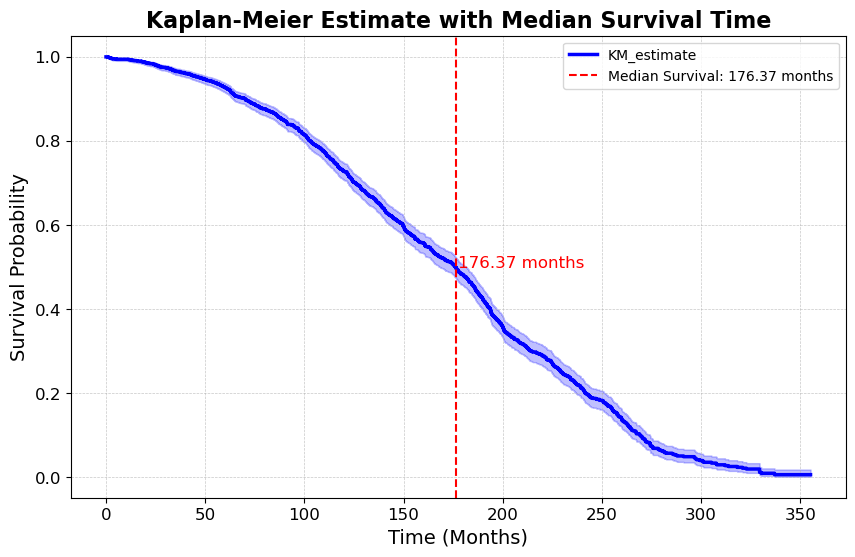

In [21]:
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=df_encoded['Overall Survival (Months)'], event_observed=df_encoded['Overall Survival Status_Living'])

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function(linewidth=2.5, color="blue")

# Add median survival time as a vertical line
median_survival_time = kmf.median_survival_time_
plt.axvline(median_survival_time, color='red', linestyle='--', label=f'Median Survival: {median_survival_time:.2f} months')

# Annotate the median survival time
plt.text(median_survival_time + 1, 0.5, f'{median_survival_time:.2f} months', color='red', fontsize=12)

# Customize the plot
plt.title("Kaplan-Meier Estimate with Median Survival Time", fontsize=16, fontweight='bold')
plt.xlabel("Time (Months)", fontsize=14)
plt.ylabel("Survival Probability", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Kaplan-Meier Survival Curve Analysis

#### Interpretation 
The Kaplan-Meier survival curve in this breast cancer dataset visually represents the probability of survival over time, with both axes indicating crucial information:

- *Y-Axis (Survival Probability)*: The vertical axis ranges from 0 to 1, showing the probability of survival. A value of 1 (100%) at the top represents the starting point, where all patients are alive. As time progresses, the survival probability decreases, reflecting patient deaths or events of interest over time.
  
- *X-Axis (Time in Months)*: The horizontal axis represents time in months, extending up to approximately 350 months (~29 years), indicating a long-term follow-up period.

#### Curve Analysis and Key Observations
1. *Survival Probability Trend*:
   - The curve begins at 1 (100%) at time 0, indicating all patients are alive initially.
   - A gradual decline in survival probability is seen over time, suggesting a consistent occurrence of events (e.g., deaths) as patients are observed.
   
2. *Initial, Middle, and Later Periods*:
   - *Initial Period*: The survival probability remains high initially, indicating fewer deaths or events shortly after diagnosis.
   - *Middle Period*: A steady decline is observed, suggesting an ongoing, stable rate of events. This could imply that the risk of death or events remains consistent during this time.
   - *Later Period*: Around 250-300 months, the curve flattens, showing fewer events and implying that patients who survive to this point may have a better long-term prognosis. By the end of the curve, the survival probability approaches zero.

3. *Median Survival Time*:
   - A dashed red line marks the median survival time at *176.37 months*.
   - This indicates the time at which the survival probability is 0.5 (50%), meaning half the cohort is expected to survive beyond this time, while the other half experiences the event.
   - This median survival time suggests a relatively favorable prognosis for the overall cohort.

4. *Shape and Slope of the Curve*:
   - The slope is initially steep, indicating a higher rate of events early in the follow-up, possibly due to advanced disease stages in some patients.
   - Beyond the median survival time, the slope becomes more gradual, showing a lower rate of events for patients who survive past the median.
   - The flattening toward the right side (post-250 months) reflects a reduced risk or fewer events, likely due to a smaller patient population at risk.

#### Significance and Clinical Relevance
- *Overall Survival*: The Kaplan-Meier curve provides an estimate of the overall survival function, showing the probability of surviving past specific time points.
- *Understanding Patient Prognosis*: This curve allows clinicians to gauge survival likelihood over time, critical for assessing patient prognosis.
- *Median Survival as a Benchmark*: The median survival time (176.37 months) serves as a benchmark, helping identify patients who may need more aggressive interventions if their prognosis appears below average.

#### Limitations
- *Non-Parametric Nature*: While the Kaplan-Meier curve offers a descriptive overview, it does not model specific predictor effects on survival.

#### Summary
The Kaplan-Meier survival curve shows a gradual decline in survival probability over time, with a median survival time of 176.37 months. This estimate offers a clear view of survival trends in the dataset and highlights the time at which half the cohort has survived. For a more understanding of how various factors influence survival, we are going to use Log Rnak Test.


## Log-Rank Test for Comparision Survival Between Age Groups

### Introduction
The following code performs a Log-Rank test to compare the survival distributions between two age groups in the dataset. This statistical test helps determine if there is a significant difference in survival times between patients younger than 50 and those aged 50 and above.

### Purpose
The purpose of this code is to evaluate whether age at diagnosis significantly impacts the overall survival of patients. By splitting the dataset into two age groups and applying the Log-Rank test, we can assess if the age groups exhibit different survival probabilities over time.


In [25]:
from lifelines.statistics import logrank_test

# Define two age groups
group1 = df_encoded[df_encoded['Age at Diagnosis'] < 50]
group2 = df_encoded[df_encoded['Age at Diagnosis'] >= 50]

# Define survival time and event for each group
durations_group1 = group1['Overall Survival (Months)']
durations_group2 = group2['Overall Survival (Months)']

events_group1 = group1['Overall Survival Status_Living']
events_group2 = group2['Overall Survival Status_Living']

# Perform the log-rank test
results = logrank_test(durations_group1, durations_group2, event_observed_A=events_group1, event_observed_B=events_group2)

# Display the results
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.59 0.44      1.18

## Analysis of Log-Rank Test Output
### Test Statistic (0)
This value is very low, indicating minimal difference between the survival distributions of the two groups under comparison.

### P-Value (0.59)
A p-value of 0.59 is much higher than the typical significance level (e.g., 0.05). This high p-value indicates that there is no statistically significant difference in survival times between the two groups. In other words, we cannot reject the null hypothesis, which assumes that both groups have the same survival distribution.

### Interpretation
This result suggests that, for the feature used to create the groups (e.g., age), there is no significant difference in survival probability between the two groups in our dataset. Therefore, the age groups (or other feature used) do not seem to influence survival outcomes in a statistically significant way.


In [27]:
from lifelines.statistics import logrank_test

# Define two groups based on Neoplasm Histologic Grade (adjust values as needed)
# Group 1: Low-grade tumors (e.g., Grade 1)
group1 = df_encoded[df_encoded['Neoplasm Histologic Grade'] == 1]

# Group 2: High-grade tumors (e.g., Grade 3)
group2 = df_encoded[df_encoded['Neoplasm Histologic Grade'] == 3]

# Define survival time and event for each group
durations_group1 = group1['Overall Survival (Months)']
durations_group2 = group2['Overall Survival (Months)']

events_group1 = group1['Overall Survival Status_Living']
events_group2 = group2['Overall Survival Status_Living']

# Perform the log-rank test
results = logrank_test(durations_group1, durations_group2, event_observed_A=events_group1, event_observed_B=events_group2)

# Display the results
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.11 0.74      0.43

#### Analysis of Log-Rank Test Output

1. *Test Statistic (test_statistic)*:
   The test statistic is 0.11. This is a very low value, suggesting little difference between the two groups' survival distributions.

2. *p-value (p)*:
   The p-value is 0.74, which is much higher than the commonly used significance threshold of 0.05. A p-value this high indicates that there is no statistically significant difference in survival between the two groups (Grade 1 vs. Grade 3) in terms of their Overall Survival (Months).

3. *Conclusion*:
   Since the p-value is not significant, we cannot reject the null hypothesis, which assumes no difference in survival times between the two tumor grades. This implies that, based on this test, tumor grade may not have a significant impact on overall survival in this cohort.

### Next Steps

Since the log-rank test did not show significant differences in survival between the grades, we may consider the following:

*Multivariate Analysis*:
   Use the Cox Proportional Hazards (CoxPH) model to assess multiple variables’ combined effects on survival. This model can provide insights into how various factors contribute to survival when accounting for other variables.


# Using CoxPH model

<lifelines.CoxPHFitter: fitted with 2509 total observations, 1144 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status_Living'
      baseline estimation = breslow
   number of observations = 2509
number of events observed = 1365
   partial log-likelihood = -8964.77
         time fit was run = 2024-10-27 08:25:16 UTC

---
                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                      
Age at Diagnosis               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Mutation Count                -0.05      0.95      0.01           -0.07           -0.03                0.94                0.97
Tumor Size                     0.00      1.00      0.00           -0.00            0.01                1.00                1.01
Tumor Stage                    0.00      1.00      0.04           -0.07            0.08                0.93                1.08
Lymph nodes examined positive  0.04      1.04      0.01            0.02            0.05                1.02                1.06
Chemotherapy_Yes               0.16      1.17      0.09           -0.02            0.34                0.98                1.40
Hormone Therapy_Yes           -0.21      0.81      0.06           -0.33           -0.09                0.72                0.92
Radio Therapy_Yes             -0.30      0.74      0.06           -0.42           -0.18                0.66                0.83

                               cmp to     z      p  -log2(p)
covariate                                                   
Age at Diagnosis                 0.00  0.02   0.99      0.02
Mutation Count                   0.00 -5.36 <0.005     23.50
Tumor Size                       0.00  1.71   0.09      3.52
Tumor Stage                      0.00  0.06   0.96      0.07
Lymph nodes examined positive    0.00  4.26 <0.005     15.58
Chemotherapy_Yes                 0.00  1.72   0.08      3.56
Hormone Therapy_Yes              0.00 -3.33 <0.005     10.19
Radio Therapy_Yes                0.00 -4.91 <0.005     20.05
---
Concordance = 0.60
Partial AIC = 17945.53
log-likelihood ratio test = 105.59 on 8 df
-log2(p) of ll-ratio test = 61.50

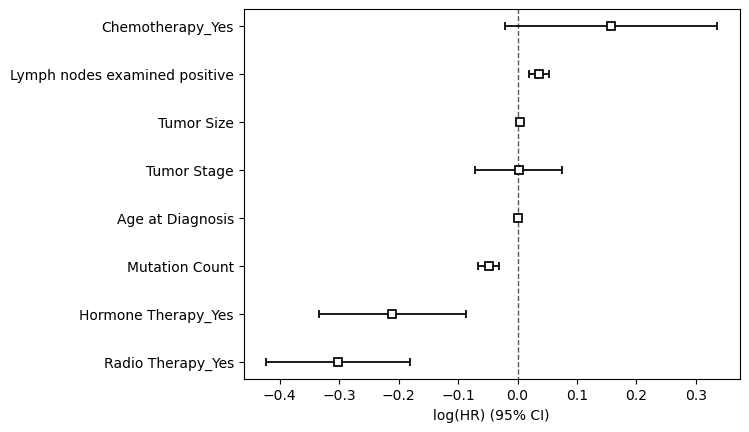

In [22]:
from lifelines import CoxPHFitter
# Selecting important features
cph = CoxPHFitter()
selected_columns = ['Age at Diagnosis', 'Mutation Count', 'Tumor Size', 'Tumor Stage', 
                    'Lymph nodes examined positive', 'Chemotherapy_Yes', 
                    'Hormone Therapy_Yes', 'Radio Therapy_Yes', 'Overall Survival (Months)', 
                    'Overall Survival Status_Living']

# Subset the DataFrame
cox_data = df_encoded[selected_columns].dropna()

# Fit the model
cph.fit(cox_data, duration_col='Overall Survival (Months)', event_col='Overall Survival Status_Living')
cph.print_summary()  # To view the coefficients

# Plot the results
cph.plot()
plt.show()

# Cox Proportional Hazards (CoxPH) Model Analysis

The impact of various factors on survival in a breast cancer dataset. The model included 2509 patients with 1365 recorded events (deaths). Key indicators and findings are detailed below.

## Model Overview
- *Duration Column*: Overall Survival (Months) – the time until the event (death) or censorship.
- *Event Column*: Overall Survival Status_Living – binary indicator where 1 indicates the event occurred, and 0 indicates censored data.
- *Baseline Estimation*: Breslow’s method for handling ties.
- *Partial Log-Likelihood*: -8964.77, assessing model fit.
- *Concordance*: 0.60, indicating moderate predictive accuracy. A value of 0.5 suggests random prediction, while 1.0 would indicate perfect prediction.
- *Partial AIC*: 17945.53, considering both model fit and complexity.

---

## Key Findings from Model Coefficients

*The model estimated the coefficients (log hazard ratios) for each factor, where a positive coefficient indicates increased hazard (worse prognosis) and a negative coefficient indicates decreased hazard (better prognosis).*

1. *Mutation Count*:
   - *Coefficient*: -0.05
   - *Hazard Ratio (HR)*: 0.95 (95% CI: 0.94 - 0.97), p < 0.005
   - *Interpretation*: A higher mutation count is associated with a slight decrease in hazard, indicating improved survival. Statistically significant.

2. *Lymph Nodes Examined Positive*:
   - *Coefficient*: 0.04
   - *HR*: 1.04 (95% CI: 1.02 - 1.06), p < 0.005
   - *Interpretation*: A higher number of positive lymph nodes is associated with an increased hazard, suggesting worse survival. Statistically significant.

3. *Hormone Therapy (Yes)*:
   - *Coefficient*: -0.21
   - *HR*: 0.81 (95% CI: 0.72 - 0.92), p < 0.005
   - *Interpretation*: Hormone therapy significantly reduces the hazard, indicating improved survival.

4. *Radio Therapy (Yes)*:
   - *Coefficient*: -0.30
   - *HR*: 0.74 (95% CI: 0.66 - 0.83), p < 0.005
   - *Interpretation*: Receiving radiotherapy is associated with a 26% reduction in hazard, suggesting better survival outcomes. Statistically significant.

5. *Chemotherapy (Yes)*:
   - *Coefficient*: 0.16
   - *HR*: 1.17, p = 0.08
   - *Interpretation*: Chemotherapy shows a positive hazard ratio (suggesting increased risk), but the effect is not statistically significant at the 0.05 level.

6. *Tumor Size*:
   - *Coefficient*: 0.00
   - *HR*: 1.01, p = 0.09
   - *Interpretation*: Tumor size has a minimal effect on hazard and is not statistically significant.

7. *Age at Diagnosis*:
   - *Coefficient*: 0.00
   - *HR*: 1.00, p = 0.99
   - *Interpretation*: Age at diagnosis has no significant impact on survival.

8. *Tumor Stage*:
   - *Coefficient*: 0.04
   - *HR*: 1.00, p = 0.96
   - *Interpretation*: Tumor stage does not significantly impact survival in this model.

---

## Statistical Tests

- *Log-Likelihood Ratio Test*:
  - *Value*: 105.59 on 8 degrees of freedom, p-value < 0.005
  - *Interpretation*: The model fits significantly better than a null model with no predictors.

- *-log2(p) of Likelihood Ratio Test*: 61.50, used to assess overall model significance.

---

## Visual Interpretation from Hazard Ratios Plot

- *Protective Factors (HR < 1)*: 
  - Hormone Therapy and Radio Therapy show hazard ratios below 1, indicating they are associated with a reduced hazard (improved survival).

- *Risk Factors (HR > 1)*:
  - Lymph Nodes Examined Positive and Chemotherapy (though not statistically significant) show hazard ratios above 1, suggesting increased hazard (poorer survival).

- *Neutral or Minimal Impact*:
  - Age at Diagnosis and Tumor Size are near 1 on the hazard ratio scale, suggesting limited or no impact on survival.

## In short

The Cox Proportional Hazards model identified key factors influencing overall survival in the breast cancer cohort:

- *Significant Factors Improving Survival*: Hormone Therapy and Radiotherapy are associated with reduced hazard, suggesting improved survival.
- *Significant Factors Worsening Survival*: An increased number of positive lymph nodes is linked to higher hazard, indicating worse survival.
- *Minimal or No Impact*: Age at Diagnosis, Tumor Size, and Tumor Stage do not significantly affect survival in this model.
- *Moderate Predictive Power*: The model’s concordance score of 0.60 suggests moderate predictive accuracy. Further model refinement or inclusion of additional predictors may be required to enhance predictive performance.

These insights provide valuable information for clinical decision-making, guiding treatment options, and furthering research into factors impacting survival outcomes.


## Conclusion

This comprehensive survival analysis of breast cancer patients utilizing Kaplan-Meier estimation and Cox Proportional Hazards (CoxPH) modeling provides valuable insights into factors influencing survival outcomes.

### Key Findings:

1. **Median survival time:** 176.37 months
2. **Significant factors improving survival:** Hormone Therapy, Radio Therapy
3. **Significant factors worsening survival:** Lymph Nodes Examined Positive
4. **Minimal impact:** Age at Diagnosis, Tumor Size, Tumor Stage

### Clinical Implications:

1. Personalized treatment strategies based on identified factors
2. Aggressive interventions for patients with poor prognosis
3. Further research into factors impacting survival outcomes

### Methodological Contributions:

1. Effective handling of missing values using KNN imputation
2. Appropriate encoding of categorical variables
3. Comparison of Kaplan-Meier and CoxPH models for survival analysis

### Future Directions:

1. Refine CoxPH models with additional predictors
2. Explore alternative survival analysis methods
3. Validate findings through external datasets or clinical trials

Overall, this study demonstrates the importance of survival analysis in breast cancer research, highlighting the need for personalized treatment approaches and ongoing research into factors influencing survival outcomes.

### Recommendations:

1. **Clinicians:** Consider identified factors when making treatment decisions
2. **Researchers:** Investigate additional predictors and alternative analysis methods
3. **Patients:** Discuss personalized treatment options with healthcare providers
